# Module 2: Numpy 与 Pandas 介绍

以下教程（http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial2/tutorial2.ipynb）包含使用numpy和pandas库模块的示例。 要执行代码，请单击单元格，然后同时按SHIFT-ENTER键。

## 2.1 Numpy介绍

Numpy代表数值Python（numerical Python），是一个支持数字计算的Python库程序包。 numpy中的基本数据结构是一个称为**ndarray的多维数组对象**。 Numpy提供了一组可以有效地操作ndarray的元素的函数。

### 2.1.1 创建ndarray

ndarray可以由列表（list）或者元组（tuple）对象创建得到。
```
shape()得到形状
ndim()得到维度数
size()得到元素个数
```

In [43]:
import numpy as np

oneDim = np.array([1.0,2,3,4,5])   # a 1-dimensional array (vector)
print(oneDim)
print("#Dimensions =", oneDim.ndim)
print("Dimension =", oneDim.shape)
print("Size =", oneDim.size)
print("Array type =", oneDim.dtype) #why

twoDim = np.array([[1,2],[3,4],[5,6],[7,8]])  # a two-dimensional array (matrix)
print(twoDim)
print("#Dimensions =", twoDim.ndim)
print("Dimension =", twoDim.shape)
print("Size =", twoDim.size)
print("Array type =", twoDim.dtype)

arrFromTuple = np.array([(1,'a',3.0),(2,'b',3.5)])  # create ndarray from tuple
print(arrFromTuple)
print("#Dimensions =", arrFromTuple.ndim)
print("Dimension =", arrFromTuple.shape)
print("Size =", arrFromTuple.size)

[1. 2. 3. 4. 5.]
#Dimensions = 1
Dimension = (5,)
Size = 5
Array type = float64
[[1 2]
 [3 4]
 [5 6]
 [7 8]]
#Dimensions = 2
Dimension = (4, 2)
Size = 8
Array type = int32
[['1' 'a' '3.0']
 ['2' 'b' '3.5']]
#Dimensions = 2
Dimension = (2, 3)
Size = 6


numpy中有几个内置函数可用于创建ndarrays

In [44]:
print(np.random.rand(5))      # random numbers from a uniform distribution between [0,1]
print(np.random.randn(5))     # random numbers from a normal distribution 正态分布
print(np.arange(-10,10,2))    # similar to range, but returns ndarray instead of list （起点，终点，步长）
print(np.arange(12).reshape(3,4))  # reshape to a matrix
print(np.linspace(0,1,10))    # split interval [0,1] into 10 equally separated values将线性空间（0，1）等分为10-1=9份
print(np.logspace(-3,3,7))    # create ndarray with values from 10^-3 to 10^3 创建等比数列
#起始位和终止位代表的是10的幂（默认基数为10），-3代表10的-3次方，3代表10的3次方

[0.10937888 0.93899032 0.87950034 0.32119063 0.65571982]
[-0.12207024 -0.32312499  1.2805172   0.62584681  0.31668189]
[-10  -8  -6  -4  -2   0   2   4   6   8]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


In [45]:
print(np.zeros((2,3)))        # a matrix of zeros  #why
print(np.ones((3,2)))         # a matrix of ones all-1矩阵J
print(np.eye(3))              # a 3 x 3 identity matrix 单位矩阵I

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## 2.1.2 逐元素操作 Element-wise Operations

可以在ndarray的每个元素上应用标准运算符，例如加法和乘法。

In [46]:
x = np.array([1,2,3,4,5])

print(x + 1)      # addition
print(x - 1)      # subtraction
print(x * 2)      # multiplication
print(x // 2)     # integer division
print(x ** 2)     # square
print(x % 2)      # modulo  
print(1 / x)      # division /narray默认为浮点数

[2 3 4 5 6]
[0 1 2 3 4]
[ 2  4  6  8 10]
[0 1 1 2 2]
[ 1  4  9 16 25]
[1 0 1 0 1]
[1.         0.5        0.33333333 0.25       0.2       ]


In [47]:
x = np.array([2,4,6,8,10])
y = np.array([1,2,3,4,5])

print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x // y)
print(x ** y)

[ 3  6  9 12 15]
[1 2 3 4 5]
[ 2  8 18 32 50]
[2. 2. 2. 2. 2.]
[2 2 2 2 2]
[     2     16    216   4096 100000]


## 2.1.3 索引和切片操作Indexing and Slicing

选择ndarray中特定元素的操作有多种。
copy复制赋值不改变原值，直接赋值会改变

In [48]:
x = np.arange(-5,5)
print(x)

y = x[3:5]     # y is a slice, i.e., pointer to a subarray in x
print(y)
y[:] = 1000    # modifying the value of y will change x
print(y)
print(x)

z = x[3:5].copy()   # makes a copy of the subarray
print(z)
z[:] = 500          # modifying the value of z will not affect x
print(z)
print(x)

[-5 -4 -3 -2 -1  0  1  2  3  4]
[-2 -1]
[1000 1000]
[  -5   -4   -3 1000 1000    0    1    2    3    4]
[1000 1000]
[500 500]
[  -5   -4   -3 1000 1000    0    1    2    3    4]


In [49]:
my2dlist = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]   # a 2-dim list
print(my2dlist)
print(my2dlist[2])        # access the third sublist
print('why ',my2dlist[:][2])     # can't access third element of each sublist #why
# print(my2dlist[:,2])    # this will cause syntax error

my2darr = np.array(my2dlist)
print('myd2drr ',my2darr)
print('third row ',my2darr[2][:])      # access the third row
print(my2darr[2,:])       # access the third row
print('third row ',my2darr[:][2])      # access the third row (similar to 2d list) #why
print(my2darr[:,2])       # access the third column
print(my2darr[:2,2:])     # access the first two rows & last two columns

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
[9, 10, 11, 12]
why  [9, 10, 11, 12]
myd2drr  [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
third row  [ 9 10 11 12]
[ 9 10 11 12]
third row  [ 9 10 11 12]
[ 3  7 11]
[[3 4]
 [7 8]]


ndarray也支持**布尔索引**

In [50]:
my2darr = np.arange(1,13,1).reshape(3,4)
print(my2darr)

divBy3 = my2darr[my2darr % 3 == 0]
#print(divBy3, type(divBy3))
print(type(divBy3))

divBy3LastRow = my2darr[2:, my2darr[2,:] % 3 == 0] #why
print(divBy3LastRow)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
<class 'numpy.ndarray'>
[[ 9 12]]


更多索引的例子

In [51]:
my2darr = np.arange(1,13,1).reshape(4,3)
print(my2darr)

indices = [2,1,0,3]    # selected row indices
print(my2darr[indices,:])

rowIndex = [0,0,1,2,3]     # row index into my2darr
columnIndex = [0,2,0,1,2]  # column index into my2darr
print(my2darr[rowIndex,columnIndex]) #why

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 7  8  9]
 [ 4  5  6]
 [ 1  2  3]
 [10 11 12]]
[ 1  3  4  8 12]


### 布尔运算、切片、列表都可以作为索引使用

## 2.1.4 Numpy中的算术函数和统计函数

numpy中有很多内置数学函数np.xxxx()，用于**对ndarray中的元素进行操作**(***注意其他库的运算不适用于ndarray元素***)

### np.multiply()
***数组和矩阵对应位置相乘***，输出与相乘数组/矩阵的大小一致
### np.dot() #why
对于秩为1的数组，执行对应位置相乘，然后再相加；
对于秩不为1的二维数组，执行矩阵乘法运算
### 星号（*）乘法运算
对***数组***执行对应位置相乘
对***矩阵***执行矩阵乘法运算

In [52]:
y = np.array([-1.4, 0.4, -3.2, 2.5, 3.4])    # generate a random vector
print(y)

print(np.abs(y))          # convert to absolute values
print(np.sqrt(abs(y)))    # apply square root to each element
print(np.sign(y))         # get the sign of each element
print(np.exp(y))          # apply exponentiation
print(np.sort(y))         # sort array

[-1.4  0.4 -3.2  2.5  3.4]
[1.4 0.4 3.2 2.5 3.4]
[1.18321596 0.63245553 1.78885438 1.58113883 1.84390889]
[-1.  1. -1.  1.  1.]
[ 0.24659696  1.4918247   0.0407622  12.18249396 29.96410005]
[-3.2 -1.4  0.4  2.5  3.4]


In [53]:
x = np.arange(-2,3)
y = np.random.randn(5)
print(x)
print(y)

print(np.add(x,y))           # element-wise addition       x + y
print(np.subtract(x,y))      # element-wise subtraction    x - y
print(np.multiply(x,y))      # element-wise multiplication x * y 对应位置元素相乘
print(np.divide(x,y))        # element-wise division       x / y
print(np.maximum(x,y))       # element-wise maximum        max(x,y)

[-2 -1  0  1  2]
[-0.14855971  0.38050574 -0.36195732  0.06557238 -0.67108934]
[-2.14855971 -0.61949426 -0.36195732  1.06557238  1.32891066]
[-1.85144029 -1.38050574  0.36195732  0.93442762  2.67108934]
[ 0.29711943 -0.38050574 -0.          0.06557238 -1.34217869]
[13.46260003 -2.62808127 -0.         15.25032306 -2.98022911]
[-0.14855971  0.38050574  0.          1.          2.        ]


In [54]:
y = np.array([-3.2, -1.4, 0.4, 2.5, 3.4])    # generate a random vector
print(y)

print("Min =", np.min(y))             # min 
print("Max =", np.max(y))             # max 
print("Average =", np.mean(y))        # mean/average
print("Std deviation =", np.std(y))   # standard deviation
print("Sum =", np.sum(y))             # sum 

[-3.2 -1.4  0.4  2.5  3.4]
Min = -3.2
Max = 3.4
Average = 0.34000000000000014
Std deviation = 2.432776191925595
Sum = 1.7000000000000006


## 2.1.5 Numpy中的线性代数功能

Numpy 提供了很多支持线性代数操作的函数

In [55]:
X = np.random.randn(2,3)    # create a 2 x 3 random matrix
print('X ',X)
print(X.T)             # matrix transpose operation X^T

y = np.random.randn(3) # random vector 
print('y ',y)
print(X.dot(y))        # matrix-vector multiplication  X * y #why
print(X.dot(X.T))      # matrix-matrix multiplication  X * X^T 矩阵乘法
print(X.T.dot(X))      # matrix-matrix multiplication  X^T * X

X  [[-0.41318813 -0.43615233 -0.02835745]
 [ 0.17885673 -0.12423207  1.53219788]]
[[-0.41318813  0.17885673]
 [-0.43615233 -0.12423207]
 [-0.02835745  1.53219788]]
y  [ 0.3898117  -1.04832737  0.36090422]
[0.28593053 0.752933  ]
[[ 0.36175743 -0.0631666 ]
 [-0.0631666   2.39505369]]
[[ 0.20271416  0.15799322  0.28576086]
 [ 0.15799322  0.20566246 -0.17797994]
 [ 0.28576086 -0.17797994  2.3484345 ]]


In [56]:
X = np.random.randn(5,3)
print(X)

C = X.T.dot(X)               # C = X^T * X is a square matrix

invC = np.linalg.inv(C)      # inverse of a square matrix 逆矩阵
print(invC)
detC = np.linalg.det(C)      # determinant of a square matrix 行列式
print(detC)
S, U = np.linalg.eig(C)      # eigenvalue S and eigenvector U of a square matrix 特征值，特征向量
print(S)
print(U)

[[ 0.56908826  0.38215825 -1.03176982]
 [-0.09092033 -1.28896314  0.71074653]
 [-1.02408252 -0.15278476 -0.43393773]
 [-0.40361453  0.45726386  0.07254462]
 [ 0.65096456 -0.68902705 -1.30351415]]
[[0.62335274 0.06016693 0.20081218]
 [0.06016693 0.40799462 0.05571657]
 [0.20081218 0.05571657 0.35678883]]
13.81077464417203
[4.06195482 1.33409403 2.54856967]
[[-0.44833529  0.85375792  0.26475061]
 [-0.13742277  0.22683067 -0.96419025]
 [ 0.88323861  0.46866328 -0.01562959]]


## 2.2 Pandas简介

Pandas提供了两种用于存储和操作数据的便捷数据结构-Series和DataFrame。 Series类似于一维数组，而DataFrame更类似于表示矩阵或电子表格表格。

### 2.2.1 Series

Series对象由**一维值数组**组成，可以使用索引数组来引用其元素。 可以从列表、numpy数组或Python字典创建Series对象。 您可以在Series对象上应用大多数numpy函数。

In [57]:
from pandas import Series

s = Series([3.1, 2.4, -1.7, 0.2, -2.9, 4.5])   # creating a series from a list
print(s)
print('Values=', s.values)     # display values of the Series
print('Index=', s.index)       # display indices of the Series

0    3.1
1    2.4
2   -1.7
3    0.2
4   -2.9
5    4.5
dtype: float64
Values= [ 3.1  2.4 -1.7  0.2 -2.9  4.5]
Index= RangeIndex(start=0, stop=6, step=1)


In [58]:
import numpy as np

s2 = Series(np.random.randn(6))  # creating a series from a numpy ndarray
print(s2)
print('Values=', s2.values)   # display values of the Series
print('Index=', s2.index)     # display indices of the Series

0    0.776252
1    0.560334
2   -0.724474
3    0.951471
4    1.866742
5   -0.637390
dtype: float64
Values= [ 0.77625215  0.56033426 -0.72447355  0.95147051  1.86674189 -0.63738959]
Index= RangeIndex(start=0, stop=6, step=1)


In [59]:
s3 = Series([1.2,2.5,-2.2,3.1,-0.8,-3.2], 
            index = ['Jan 1','Jan 2','Jan 3','Jan 4','Jan 5','Jan 6',])
print(s3)
print('Values=', s3.values)   # display values of the Series
print('Index=', s3.index)     # display indices of the Series

Jan 1    1.2
Jan 2    2.5
Jan 3   -2.2
Jan 4    3.1
Jan 5   -0.8
Jan 6   -3.2
dtype: float64
Values= [ 1.2  2.5 -2.2  3.1 -0.8 -3.2]
Index= Index(['Jan 1', 'Jan 2', 'Jan 3', 'Jan 4', 'Jan 5', 'Jan 6'], dtype='object')


In [60]:
capitals = {'MI': 'Lansing', 'CA': 'Sacramento', 'TX': 'Austin', 'MN': 'St Paul'}

s4 = Series(capitals)   # creating a series from dictionary object
print(s4)
print('Values=', s4.values)   # display values of the Series
print('Index=', s4.index)     # display indices of the Series

MI       Lansing
CA    Sacramento
TX        Austin
MN       St Paul
dtype: object
Values= ['Lansing' 'Sacramento' 'Austin' 'St Paul']
Index= Index(['MI', 'CA', 'TX', 'MN'], dtype='object')


In [61]:
s3 = Series([1.2,2.5,-2.2,3.1,-0.8,-3.2], 
            index = ['Jan 1','Jan 2','Jan 3','Jan 4','Jan 5','Jan 6',])
print(s3)

# Accessing elements of a Series

print('\ns3[2]=', s3[2])        # display third element of the Series
print('s3[\'Jan 3\']=', s3['Jan 3'])   # indexing element of a Series 

print('\ns3[1:3]=')             # display a slice of the Series
print(s3[1:3])
print('s3.iloc([1:3])=')      # display a slice of the Series
print(s3.iloc[1:3])

Jan 1    1.2
Jan 2    2.5
Jan 3   -2.2
Jan 4    3.1
Jan 5   -0.8
Jan 6   -3.2
dtype: float64

s3[2]= -2.2
s3['Jan 3']= -2.2

s3[1:3]=
Jan 2    2.5
Jan 3   -2.2
dtype: float64
s3.iloc([1:3])=
Jan 2    2.5
Jan 3   -2.2
dtype: float64


***Series可以设置index，后面会讲到的DataFrame也可以设置index***

In [62]:
print('shape =', s3.shape)  # get the dimension of the Series
print('size =', s3.size)    # get the # of elements of the Series

shape = (6,)
size = 6


In [63]:
print(s3[s3 > 0])   # applying filter to select elements of the Series

Jan 1    1.2
Jan 2    2.5
Jan 4    3.1
dtype: float64


In [64]:
print(s3 + 4)       # applying scalar operation on a numeric Series
print(s3 / 4)    

Jan 1    5.2
Jan 2    6.5
Jan 3    1.8
Jan 4    7.1
Jan 5    3.2
Jan 6    0.8
dtype: float64
Jan 1    0.300
Jan 2    0.625
Jan 3   -0.550
Jan 4    0.775
Jan 5   -0.200
Jan 6   -0.800
dtype: float64


In [65]:
print(np.log(s3 + 4))    # applying numpy math functions to a numeric Series

Jan 1    1.648659
Jan 2    1.871802
Jan 3    0.587787
Jan 4    1.960095
Jan 5    1.163151
Jan 6   -0.223144
dtype: float64


### 2.2.2 DataFrame

DataFrame对象是类似于表格的电子表格数据结构，包含多列，每个列可以具有不同的类型（数字，字符串，布尔值等）。 与Series不同，DataFrame具有不同的行和列索引。 创建DataFrame对象的方法有很多（例如，从字典，元组列表甚至是numpy的ndarrays）。

***DataFrame=Data+Frame,Data可以是List、Dict、ndarray，Frame需要自己添加DataFrame(xxxx,columns=xxxx)***

In [66]:
from pandas import DataFrame

cars = {'make': ['Ford', 'Honda', 'Toyota', 'Tesla'],
       'model': ['Taurus', 'Accord', 'Camry', 'Model S'],
       'MSRP': [27595, 23570, 23495, 68000]}          
carData = DataFrame(cars)   # creating DataFrame from dictionary
carData                     # display the table

,make,model,MSRP
0,Ford,Taurus,27595
1,Honda,Accord,23570
2,Toyota,Camry,23495
3,Tesla,Model S,68000


In [67]:
print(carData.index)       # print the row indices
print(carData.columns)     # print the column indices

RangeIndex(start=0, stop=4, step=1)
Index(['make', 'model', 'MSRP'], dtype='object')


In [68]:
carData2 = DataFrame(cars, index = [1,2,3,4])  # change the row index
carData2['year'] = 2018    # add column with same value
carData2['dealership'] = ['Courtesy Ford','Capital Honda','Spartan Toyota','N/A']
carData2                   # display table

,make,model,MSRP,year,dealership
1,Ford,Taurus,27595,2018,Courtesy Ford
2,Honda,Accord,23570,2018,Capital Honda
3,Toyota,Camry,23495,2018,Spartan Toyota
4,Tesla,Model S,68000,2018,N/A


利用一系列元组（tuple）创建DataFrame

In [69]:
tuplelist = [(2011,45.1,32.4),(2012,42.4,34.5),(2013,47.2,39.2),
              (2014,44.2,31.4),(2015,39.9,29.8),(2016,41.5,36.7)]
columnNames = ['year','temp','precip']
weatherData = DataFrame(tuplelist, columns=columnNames)
weatherData

,year,temp,precip
0,2011,45.1,32.4
1,2012,42.4,34.5
2,2013,47.2,39.2
3,2014,44.2,31.4
4,2015,39.9,29.8
5,2016,41.5,36.7


利用 numpy ndarray 创建 DataFrame

In [70]:
import numpy as np

npdata = np.random.randn(5,3)  # create a 5 by 3 random matrix
columnNames = ['x1','x2','x3']
data = DataFrame(npdata, columns=columnNames)
data

,x1,x2,x3
0,-0.849299,1.313026,0.024533
1,-0.404855,-1.466470,-1.484221
2,0.087351,-0.531717,-0.083389
3,0.787258,0.935849,-0.979656
4,1.203938,0.013932,0.698534


### DataFrame中的元素可以以多种方式进行访问

loc[]函数：通过行索引 "Index" 中的具体值来取行数据（如取"Index"为"A"的行）

iloc[]函数：通过行号来取行数据（如取第二行的数据）

iloc[行][列]/loc[行][列]

详细例子： https://blog.csdn.net/W_weiying/article/details/81411257

In [71]:
# accessing an entire column will return a Series object

print(data['x2'])
print(type(data['x2']))

0    1.313026
1   -1.466470
2   -0.531717
3    0.935849
4    0.013932
Name: x2, dtype: float64
<class 'pandas.core.series.Series'>


In [72]:
# accessing an entire row will return a Series object

print('Row 3 of data table:')
print(data.iloc[2])       # returns the 3rd row of DataFrame
print(type(data.iloc[2]))
print('\nRow 3 of car data table:')
print(carData2.iloc[2])   # row contains objects of different types
print(type(carData2.iloc[2]))

Row 3 of data table:
x1    0.087351
x2   -0.531717
x3   -0.083389
Name: 2, dtype: float64
<class 'pandas.core.series.Series'>

Row 3 of car data table:
make                  Toyota
model                  Camry
MSRP                   23495
year                    2018
dealership    Spartan Toyota
Name: 3, dtype: object
<class 'pandas.core.series.Series'>


In [73]:
# accessing a specific element of the DataFrame

print(carData2.iloc[1,2])      # retrieving second row, third column
print(carData2.loc[1,'model']) # retrieving second row, column named 'model'

# accessing a slice of the DataFrame

print('carData2.iloc[1:3,1:3]=')
print(carData2.iloc[1:3,1:3])

for item in carData2['make']:
    print(item)
    
for item in carData2.make:
    print(item)

23570
Taurus
carData2.iloc[1:3,1:3]=
    model   MSRP
2  Accord  23570
3   Camry  23495
Ford
Honda
Toyota
Tesla
Ford
Honda
Toyota
Tesla


In [74]:
print('carData2.shape =', carData2.shape)
print('carData2.size =', carData2.size)

carData2.shape = (4, 5)
carData2.size = 20


In [75]:
# selection and filtering

print('carData2[carData2.MSRP > 25000]')  
print(carData2[carData2.MSRP > 25000])

carData2[carData2.MSRP > 25000]
    make    model   MSRP  year     dealership
1   Ford   Taurus  27595  2018  Courtesy Ford
4  Tesla  Model S  68000  2018            N/A


### 2.2.3 算术操作 Arithmetic Operations

In [76]:
print(data)

print('\nData transpose operation:')
print(data.T)    # transpose operation

print('\nAddition:')
print(data + 4)    # addition operation

print('\nMultiplication:')
print(data * 10)   # multiplication operation

         x1        x2        x3
0 -0.849299  1.313026  0.024533
1 -0.404855 -1.466470 -1.484221
2  0.087351 -0.531717 -0.083389
3  0.787258  0.935849 -0.979656
4  1.203938  0.013932  0.698534

Data transpose operation:
           0         1         2         3         4
x1 -0.849299 -0.404855  0.087351  0.787258  1.203938
x2  1.313026 -1.466470 -0.531717  0.935849  0.013932
x3  0.024533 -1.484221 -0.083389 -0.979656  0.698534

Addition:
         x1        x2        x3
0  3.150701  5.313026  4.024533
1  3.595145  2.533530  2.515779
2  4.087351  3.468283  3.916611
3  4.787258  4.935849  3.020344
4  5.203938  4.013932  4.698534

Multiplication:
          x1         x2         x3
0  -8.492989  13.130264   0.245325
1  -4.048554 -14.664699 -14.842205
2   0.873510  -5.317175  -0.833891
3   7.872575   9.358495  -9.796562
4  12.039377   0.139322   6.985343


In [77]:
print('data =')
print(data)

columnNames = ['x1','x2','x3']
data2 = DataFrame(np.random.randn(5,3), columns=columnNames)
print('\ndata2 =')
print(data2)

print('\ndata + data2 = ')
print(data.add(data2))

print('\ndata * data2 = ')
print(data.mul(data2)) # 对应位置元素相乘

data =
         x1        x2        x3
0 -0.849299  1.313026  0.024533
1 -0.404855 -1.466470 -1.484221
2  0.087351 -0.531717 -0.083389
3  0.787258  0.935849 -0.979656
4  1.203938  0.013932  0.698534

data2 =
         x1        x2        x3
0  0.615285 -1.309067 -0.353156
1  1.242110 -0.470433  0.323451
2 -0.344703 -0.074419 -1.063357
3  0.166470 -1.111773  1.221402
4  0.017167  1.370466 -0.356928

data + data2 = 
         x1        x2        x3
0 -0.234014  0.003959 -0.328623
1  0.837255 -1.936903 -1.160770
2 -0.257352 -0.606137 -1.146746
3  0.953728 -0.175923  0.241746
4  1.221105  1.384398  0.341607

data * data2 = 
         x1        x2        x3
0 -0.522561 -1.718840 -0.008664
1 -0.502875  0.689876 -0.480072
2 -0.030110  0.039570  0.088672
3  0.131055 -1.040452 -1.196554
4  0.020668  0.019094 -0.249326


In [78]:
print(data.abs())    # get the absolute value for each element

print('\nMaximum value per column:')
print(data.max())    # get maximum value for each column

print('\nMinimum value per row:')
print(data.min(axis=1))    # get minimum value for each row

print('\nSum of values per column:')
print(data.sum())    # get sum of values for each column

print('\nAverage value per row:')
print(data.mean(axis=1))    # get average value for each row

print('\nCalculate max - min per column')
f = lambda x: x.max() - x.min()
print(data.apply(f)) # 默认对column使用

print('\nCalculate max - min per row')
f = lambda x: x.max() - x.min() 
print(data.apply(f, axis=1))

         x1        x2        x3
0  0.849299  1.313026  0.024533
1  0.404855  1.466470  1.484221
2  0.087351  0.531717  0.083389
3  0.787258  0.935849  0.979656
4  1.203938  0.013932  0.698534

Maximum value per column:
x1    1.203938
x2    1.313026
x3    0.698534
dtype: float64

Minimum value per row:
0   -0.849299
1   -1.484221
2   -0.531717
3   -0.979656
4    0.013932
dtype: float64

Sum of values per column:
x1    0.824392
x2    0.264621
x3   -1.824199
dtype: float64

Average value per row:
0    0.162753
1   -1.118515
2   -0.175919
3    0.247817
4    0.638801
dtype: float64

Calculate max - min per column
x1    2.053237
x2    2.779496
x3    2.182755
dtype: float64

Calculate max - min per row
0    2.162325
1    1.079365
2    0.619068
3    1.915506
4    1.190006
dtype: float64


### 2.2.4 Series 与 DataFrame的绘制

可以使用内置函数来绘制存储在Series或DataFrame中的数据。

<AxesSubplot:title={'center':'Line plot'}>

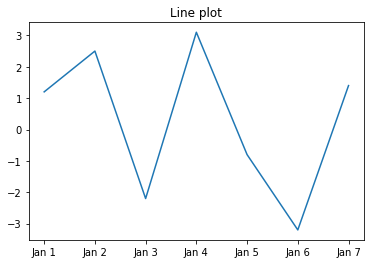

In [86]:
%matplotlib inline

s3 = Series([1.2,2.5,-2.2,3.1,-0.8,-3.2,1.4], 
            index = ['Jan 1','Jan 2','Jan 3','Jan 4','Jan 5','Jan 6','Jan 7'])
s3.plot(kind='line', title='Line plot')#折线图

<AxesSubplot:title={'center':'Bar plot'}>

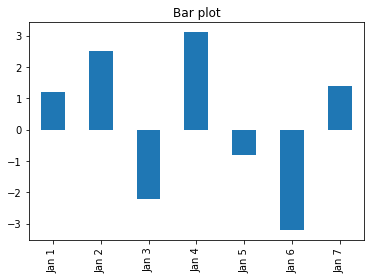

In [80]:
s3.plot(kind='bar', title='Bar plot') #柱状图

<AxesSubplot:title={'center':'Histogram'}, ylabel='Frequency'>

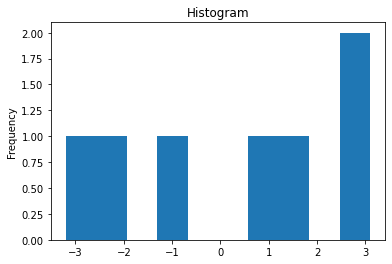

In [81]:
# [1.2,2.5,-2.2,3.1,-0.8,-3.2,1.4]
s3.plot(kind='hist', title = 'Histogram') #直方图

<AxesSubplot:title={'center':'Histogram'}, ylabel='Frequency'>

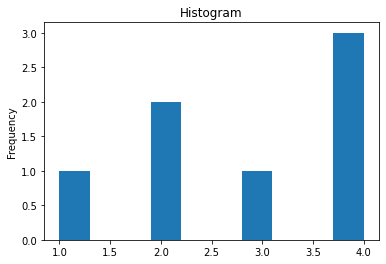

In [82]:
s4 = Series([1,2,2,3,4,4,4], 
            index = ['Jan 1','Jan 2','Jan 3','Jan 4','Jan 5','Jan 6','Jan 7'])
s4.plot(kind='hist', title = 'Histogram')

<AxesSubplot:title={'center':'Box plot'}>

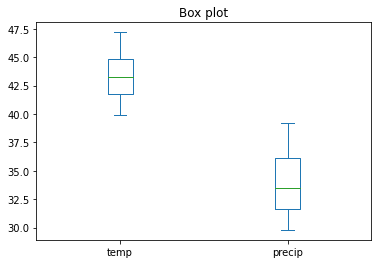

In [83]:
tuplelist = [(2011,45.1,32.4),(2012,42.4,34.5),(2013,47.2,39.2),
              (2014,44.2,31.4),(2015,39.9,29.8),(2016,41.5,36.7)]
columnNames = ['year','temp','precip'] # precip降雨
weatherData = DataFrame(tuplelist, columns=columnNames)
weatherData[['temp','precip']].plot(kind='box', title='Box plot')#箱型图